In [1]:
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler

In [2]:
bitcoin = yf.Ticker("BTC-INR")

In [3]:
bitcoin.info

{'companyOfficers': [],
 'name': 'Bitcoin',
 'startDate': 1367107200,
 'description': 'Bitcoin (BTC) is a cryptocurrency . Users are able to generate BTC through the process of mining. Bitcoin has a current supply of 18,708,993. The last known price of Bitcoin is 49,986.5034803 USD and is down -11.55 over the last 24 hours. It is currently trading on 9551 active market(s) with $103,593,223,572.65 traded over the last 24 hours. More information can be found at https://bitcoin.org/.',
 'maxAge': 1,
 'previousClose': 3461574.5,
 'regularMarketOpen': 3461574.5,
 'twoHundredDayAverage': 2844280.5,
 'trailingAnnualDividendYield': None,
 'payoutRatio': None,
 'volume24Hr': 7532636012544,
 'regularMarketDayHigh': 3773362,
 'navPrice': None,
 'averageDailyVolume10Day': 4905926694507,
 'totalAssets': None,
 'regularMarketPreviousClose': 3461574.5,
 'fiftyDayAverage': 4200676.5,
 'trailingAnnualDividendRate': None,
 'open': 3461574.5,
 'toCurrency': 'INR=X',
 'averageVolume10days': 4905926694507,

In [4]:
bitcoin.history(period='5d')


Open       High         Low       Close         Volume  \
Date                                                                       
2021-05-09  4315477.00  4339921.0  4139905.00  4267878.50  4830337386515   
2021-05-10  4269238.50  4365943.0  3972143.25  4105709.25  5275594240615   
2021-05-11  4104786.25  4172762.5  4012453.00  4160718.00  4498525038311   
2021-05-12  4161448.75  4256196.5  3621502.00  3621502.00  5542009807476   
2021-05-13  3461574.50  3773362.0  3461574.50  3672719.50  7532636012544   

            Dividends  Stock Splits  
Date                                 
2021-05-09          0             0  
2021-05-10          0             0  
2021-05-11          0             0  
2021-05-12          0             0  
2021-05-13          0             0

In [5]:
df=bitcoin.history(start='2001-01-19', end='2021-05-13', actions=False)

In [6]:
df

Open          High           Low         Close  \
Date                                                                 
2019-09-18  7.349759e+05  7.314907e+05  7.254785e+05  7.259610e+05   
2019-09-19  7.261210e+05  7.350398e+05  7.033428e+05  7.329512e+05   
2019-09-20  7.329443e+05  7.324158e+05  7.214724e+05  7.249939e+05   
2019-09-21  7.251369e+05  7.254537e+05  7.121104e+05  7.134639e+05   
2019-09-22  7.137771e+05  7.173071e+05  7.064909e+05  7.170186e+05   
...                  ...           ...           ...           ...   
2021-05-08  4.203413e+06  4.358518e+06  4.175742e+06  4.310082e+06   
2021-05-09  4.315477e+06  4.339921e+06  4.139905e+06  4.267878e+06   
2021-05-10  4.269238e+06  4.365943e+06  3.972143e+06  4.105709e+06   
2021-05-11  4.104786e+06  4.172762e+06  4.012453e+06  4.160718e+06   
2021-05-12  4.161449e+06  4.256196e+06  3.621502e+06  3.621502e+06   

                   Volume  
Date                       
2019-09-18  1151007367909  
2019-09-19  1423413584969  
2019-09-20  1049162707455  
2019-09-21   955959548212  
2019-09-22   939823886302  
...                   ...  
2021-05-08  4792310948535  
2021-05-09  4830337386515  
2021-05-10  5275594240615  
2021-05-11  4498525038311  
2021-05-12  5542009807476  

[599 rows x 5 columns]

In [7]:
df.index

DatetimeIndex(['2019-09-18', '2019-09-19', '2019-09-20', '2019-09-21',
               '2019-09-22', '2019-09-23', '2019-09-24', '2019-09-25',
               '2019-09-26', '2019-09-27',
               ...
               '2021-05-03', '2021-05-04', '2021-05-05', '2021-05-06',
               '2021-05-07', '2021-05-08', '2021-05-09', '2021-05-10',
               '2021-05-11', '2021-05-12'],
              dtype='datetime64[ns]', name='Date', length=599, freq=None)

In [8]:
df.shape

(599, 5)

In [9]:
df.isnull().sum()

Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [10]:
df=df.drop(['Open','High','Volume','Low'],axis=1)

In [11]:
df.head()

Close
Date                   
2019-09-18  725961.0000
2019-09-19  732951.1875
2019-09-20  724993.9375
2019-09-21  713463.9375
2019-09-22  717018.5625

In [12]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,7)

In [13]:
plt.figure(figsize=(20,7))
plt.title("Price of bitcoin over the years")
plt.plot(df['2019-09-18':'2021-05-13'])
plt.ylabel("Price in INR")
plt.xlabel("Time")

Text(0.5, 0, 'Time')

Text(0.5, 0, 'Time')

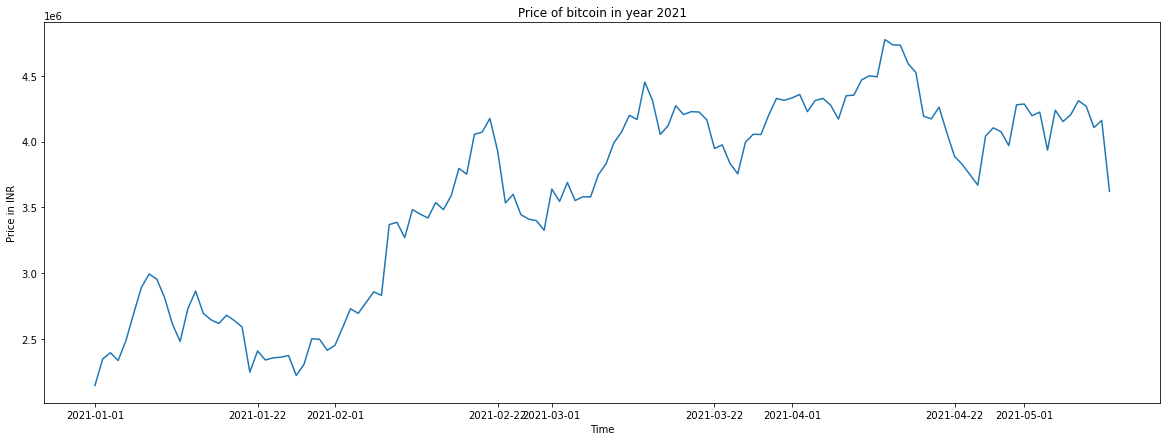

In [14]:
plt.figure(figsize=(20,7))
plt.title("Price of bitcoin in year 2021")
plt.plot(df['2021-01-01':'2021-05-13'])
plt.ylabel("Price in INR")
plt.xlabel("Time")

In [15]:
data=df.values

In [16]:
data

array([[ 725961.     ],
       [ 732951.1875 ],
       [ 724993.9375 ],
       [ 713463.9375 ],
       [ 717018.5625 ],
       [ 688840.875  ],
       [ 611785.25   ],
       [ 602472.6875 ],
       [ 576215.6875 ],
       [ 583067.125  ],
       [ 581412.25   ],
       [ 571408.5    ],
       [ 585926.1875 ],
       [ 593290.375  ],
       [ 597178.3125 ],
       [ 586688.8125 ],
       [ 581185.625  ],
       [ 577328.     ],
       [ 565767.3125 ],
       [ 586185.4375 ],
       [ 586053.9375 ],
       [ 611323.4375 ],
       [ 609553.5625 ],
       [ 591260.8125 ],
       [ 592312.25   ],
       [ 590159.     ],
       [ 596671.25   ],
       [ 586683.875  ],
       [ 574306.125  ],
       [ 576431.25   ],
       [ 566819.3125 ],
       [ 567910.75   ],
       [ 584096.375  ],
       [ 584640.5625 ],
       [ 572292.25   ],
       [ 531475.1875 ],
       [ 532109.625  ],
       [ 613524.0625 ],
       [ 654913.8125 ],
       [ 676643.4375 ],
       [ 654827.125  ],
       [ 668372.

In [17]:
len(data)

599

In [18]:
import math

In [19]:
train_len=math.ceil(len(data)*0.92)

In [20]:
train_len

552

In [22]:
min_max_scalar=MinMaxScaler(feature_range=(0,1))

In [23]:
scaled_data=min_max_scalar.fit_transform(data)

In [24]:
len(scaled_data)

599

In [25]:
scaled_data

array([[8.08194375e-02],
       [8.24065682e-02],
       [8.05998648e-02],
       [7.79819642e-02],
       [7.87890461e-02],
       [7.23912676e-02],
       [5.48956934e-02],
       [5.27812647e-02],
       [4.68195807e-02],
       [4.83752079e-02],
       [4.79994665e-02],
       [4.57281028e-02],
       [4.90243616e-02],
       [5.06964094e-02],
       [5.15791704e-02],
       [4.91975165e-02],
       [4.79480111e-02],
       [4.70721326e-02],
       [4.44472643e-02],
       [4.90832246e-02],
       [4.90533674e-02],
       [5.47908384e-02],
       [5.43889861e-02],
       [5.02355947e-02],
       [5.04743249e-02],
       [4.99854269e-02],
       [5.14640412e-02],
       [4.91963955e-02],
       [4.63860121e-02],
       [4.68685244e-02],
       [4.46861222e-02],
       [4.49339344e-02],
       [4.86089004e-02],
       [4.87324589e-02],
       [4.59287594e-02],
       [3.66611953e-02],
       [3.68052451e-02],
       [5.52904930e-02],
       [6.46880865e-02],
       [6.96218245e-02],


In [26]:
train_data=scaled_data[0:train_len,:]

In [27]:
len(train_data)

552

In [28]:
interval=60

In [29]:
x_train=[]
y_train=[]

for i in range(interval,len(train_data)):
    x_train.append(train_data[i-interval:i,0])
    y_train.append(train_data[i,0])

In [30]:
x_train

[array([0.08081944, 0.08240657, 0.08059986, 0.07798196, 0.07878905,
        0.07239127, 0.05489569, 0.05278126, 0.04681958, 0.04837521,
        0.04799947, 0.0457281 , 0.04902436, 0.05069641, 0.05157917,
        0.04919752, 0.04794801, 0.04707213, 0.04444726, 0.04908322,
        0.04905337, 0.05479084, 0.05438899, 0.05023559, 0.05047432,
        0.04998543, 0.05146404, 0.0491964 , 0.04638601, 0.04686852,
        0.04468612, 0.04493393, 0.0486089 , 0.04873246, 0.04592876,
        0.0366612 , 0.03680525, 0.05529049, 0.06468809, 0.06962182,
        0.0646684 , 0.0677438 , 0.06406177, 0.0642505 , 0.06466371,
        0.0652977 , 0.06386681, 0.06727549, 0.06611401, 0.0669137 ,
        0.06548699, 0.05868308, 0.05882409, 0.06273211, 0.05830068,
        0.05968445, 0.0602868 , 0.0582787 , 0.05410978, 0.05509571]),
 array([0.08240657, 0.08059986, 0.07798196, 0.07878905, 0.07239127,
        0.05489569, 0.05278126, 0.04681958, 0.04837521, 0.04799947,
        0.0457281 , 0.04902436, 0.05069641, 0.

In [31]:
y_train

[0.055527023573125306,
 0.05172313503989481,
 0.04988162187629486,
 0.04681213053532621,
 0.04049743858544588,
 0.03492768042380928,
 0.03657761201966053,
 0.030876149955925816,
 0.03230790660911921,
 0.03307235261214418,
 0.037811493528919424,
 0.03724365260203047,
 0.042433986878056856,
 0.03931225956428104,
 0.03694034054476883,
 0.03507986860375231,
 0.03525102265646274,
 0.03370351954518688,
 0.0367285585132084,
 0.03816042869201508,
 0.03831002706890532,
 0.0384342524712291,
 0.03524588562246214,
 0.03303972818902991,
 0.03191140421406226,
 0.032045705014564,
 0.032668542005732784,
 0.03034109664522021,
 0.030780015047536233,
 0.027593599420247403,
 0.02309119488390013,
 0.033295643302750144,
 0.03248246643022783,
 0.03252410904424645,
 0.032077619902595306,
 0.037251358153031364,
 0.03493510925612782,
 0.03446525512419496,
 0.03369871599267528,
 0.03318025870756,
 0.03421758480813866,
 0.034670076616591605,
 0.03637441536260386,
 0.034090024590925,
 0.032446131138629694,
 0.0324

In [32]:
import numpy as np

In [33]:
x_train,y_train=np.array(x_train),np.array(y_train)

In [34]:
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

In [35]:
x_train.shape

(492, 60, 1)

In [36]:
import tensorflow as tf
import keras
from keras.preprocessing import image
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten,Dense,Dropout,BatchNormalization,LSTM
from keras import regularizers
from tensorflow.keras.optimizers import Adam,RMSprop,SGD,Adamax


In [37]:
model=Sequential()
# model.add(LSTM(100,return_sequences=True,input_shape=(x_train.shape[1],1)))
# model.add(LSTM(150,return_sequences=True,input_shape=(x_train.shape[1],1)))
# model.add(LSTM(75,return_sequences=True))
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))
# model.add(Dropout(0.2))
# model.add(LSTM(units=50, return_sequences=True))
# model.add(Dropout(0.2))

# model.add(LSTM(units=50, return_sequences=True))
# model.add(Dropout(0.2))

model.add(LSTM(units=50))
# model.add(Dropout(0.2))
# model.add(LSTM(50,return_sequences=False))
model.add(Dense(50))
# model.add(drop)
# model.add(Dense(25))
model.add(Dense(1))

In [38]:
model.compile(optimizer="adam",loss="mean_squared_error")

In [39]:
history=model.fit(x_train,y_train,batch_size=64,epochs=100)

Epoch 1/100
8/8 [==============================] - 6s 76ms/step - loss: 0.0638
Epoch 2/100
8/8 [==============================] - 1s 74ms/step - loss: 0.0152
Epoch 3/100
8/8 [==============================] - 1s 75ms/step - loss: 0.0041
Epoch 4/100
8/8 [==============================] - 1s 74ms/step - loss: 0.0037
Epoch 5/100
8/8 [==============================] - 1s 75ms/step - loss: 0.0021
Epoch 6/100
8/8 [==============================] - 1s 74ms/step - loss: 0.0017
Epoch 7/100
8/8 [==============================] - 1s 76ms/step - loss: 0.0013
Epoch 8/100
8/8 [==============================] - 1s 79ms/step - loss: 0.0012
Epoch 9/100
8/8 [==============================] - 1s 78ms/step - loss: 0.0013
Epoch 10/100
8/8 [==============================] - 1s 76ms/step - loss: 0.0012
Epoch 11/100
8/8 [==============================] - 1s 74ms/step - loss: 0.0012
Epoch 12/100
8/8 [==============================] - 1s 74ms/step - loss: 9.9022e-04
Epoch 13/100
8/8 [===========================

8/8 [==============================] - 1s 76ms/step - loss: 4.0260e-04
Epoch 100/100
8/8 [==============================] - 1s 80ms/step - loss: 4.1828e-04


In [40]:
test_data=scaled_data[train_len-interval:,:]

In [41]:
x_test=[]
y_test=data[train_len:,:]
for i in range(interval,len(test_data)):
    x_test.append(test_data[i-interval:i,0])

In [42]:
y_test

array([[4055135.  ],
       [4053488.75],
       [4200873.5 ],
       [4327242.  ],
       [4313079.  ],
       [4330986.5 ],
       [4357392.5 ],
       [4226751.5 ],
       [4311483.  ],
       [4327746.5 ],
       [4276035.5 ],
       [4170133.5 ],
       [4347744.  ],
       [4352631.5 ],
       [4468330.5 ],
       [4499101.5 ],
       [4491485.5 ],
       [4774301.  ],
       [4734890.5 ],
       [4731307.5 ],
       [4591076.5 ],
       [4524215.5 ],
       [4191673.  ],
       [4172547.  ],
       [4260859.5 ],
       [4066144.75],
       [3886924.75],
       [3825294.75],
       [3747273.5 ],
       [3668868.  ],
       [4041646.  ],
       [4104108.5 ],
       [4074136.75],
       [3968757.5 ],
       [4279028.5 ],
       [4284798.5 ],
       [4196083.  ],
       [4223535.  ],
       [3934903.  ],
       [4237814.  ],
       [4151654.75],
       [4203679.5 ],
       [4310081.5 ],
       [4267878.5 ],
       [4105709.25],
       [4160718.  ],
       [3621502.  ]])

In [43]:
x_test

[array([0.45523542, 0.42067255, 0.4401351 , 0.48405163, 0.48327267,
        0.46417806, 0.4727732 , 0.503903  , 0.53587324, 0.52791447,
        0.54638758, 0.56492563, 0.55899312, 0.6809508 , 0.68487997,
        0.65853352, 0.70691649, 0.6989576 , 0.69237692, 0.71898619,
        0.70673553, 0.73074086, 0.77790439, 0.76794093, 0.83662722,
        0.8403533 , 0.86398116, 0.80779228, 0.71839427, 0.7330238 ,
        0.69817632, 0.69033357, 0.68780519, 0.67124629, 0.74212197,
        0.7209092 , 0.75364794, 0.72234973, 0.72895607, 0.72870807,
        0.76685722, 0.78588394, 0.82189687, 0.84057939, 0.86935927,
        0.8622084 , 0.92675623, 0.8947403 , 0.83648685, 0.85126981,
        0.88601177, 0.87065368, 0.8756781 , 0.87513522, 0.86175163,
        0.81212862, 0.8184562 , 0.78646525, 0.76842949, 0.82295766]),
 array([0.42067255, 0.4401351 , 0.48405163, 0.48327267, 0.46417806,
        0.4727732 , 0.503903  , 0.53587324, 0.52791447, 0.54638758,
        0.56492563, 0.55899312, 0.6809508 , 0.

In [44]:
len(y_test)

47

In [45]:
len(x_test)

47

In [46]:
x_test=np.array(x_test)

In [47]:
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [48]:
predictions=model.predict(x_test)
predictions=min_max_scalar.inverse_transform(predictions)

In [49]:
predictions[0:5]

array([[3823964.2],
       [3888028.2],
       [3960930.2],
       [4064148.5],
       [4187841. ]], dtype=float32)

In [50]:
rmse_error=np.sqrt(np.mean(predictions-y_test)**2)
rmse_error

24150.30319148936

In [51]:
train_data=df[0:train_len]
valid_data=df[train_len:]
valid_data['predictions']=predictions

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [52]:
train_data.head()

Close
Date                   
2019-09-18  725961.0000
2019-09-19  732951.1875
2019-09-20  724993.9375
2019-09-21  713463.9375
2019-09-22  717018.5625

In [53]:
valid_data.head()

Close  predictions
Date                               
2021-03-27  4055135.00   3823964.25
2021-03-28  4053488.75   3888028.25
2021-03-29  4200873.50   3960930.25
2021-03-30  4327242.00   4064148.50
2021-03-31  4313079.00   4187841.00

In [100]:
plt.figure(figsize=(20,7))
plt.title("Model Prediction vs Actual Price")
plt.xlabel("Date",fontsize=18)
plt.ylabel("Price in INR(in Million)",fontsize=18)
plt.plot(train_data['Close'])
plt.plot(valid_data['Close'])
plt.plot(valid_data['predictions'])
plt.legend(['Train','Actual Price','Model Prediction'],loc='lower right',fontsize=15)
plt.show()

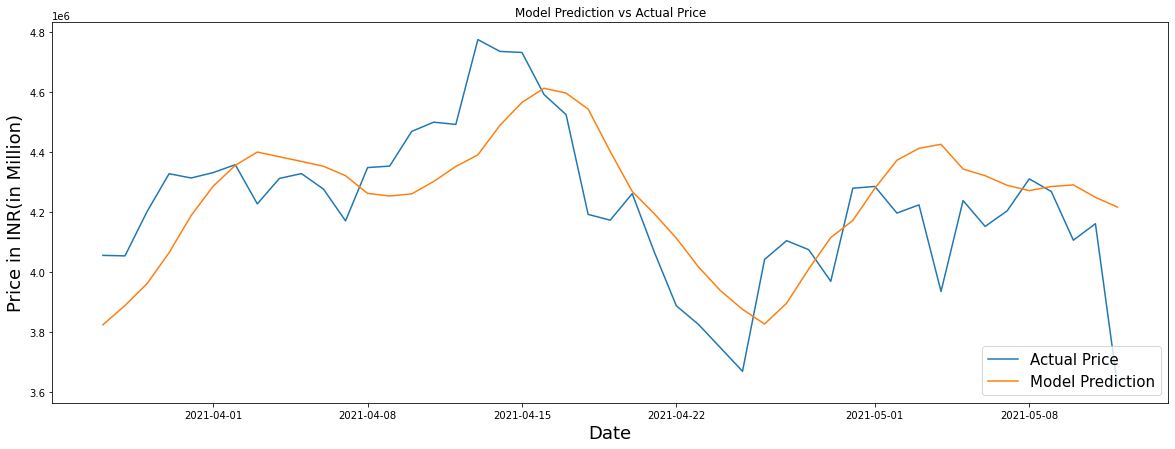

In [99]:
plt.figure(figsize=(20,7))
plt.title("Model Prediction vs Actual Price")
plt.xlabel("Date",fontsize=18)
plt.ylabel("Price in INR(in Million)",fontsize=18)
# plt.plot(train_data['Close'])
plt.plot(valid_data['Close'])
plt.plot(valid_data['predictions'])
plt.legend(['Actual Price','Model Prediction'],loc='lower right',fontsize=15)
plt.show()

In [56]:
valid_data.head(30)

Close  predictions
Date                               
2021-03-27  4055135.00   3823964.25
2021-03-28  4053488.75   3888028.25
2021-03-29  4200873.50   3960930.25
2021-03-30  4327242.00   4064148.50
2021-03-31  4313079.00   4187841.00
2021-04-01  4330986.50   4285885.50
2021-04-02  4357392.50   4355111.00
2021-04-03  4226751.50   4399444.00
2021-04-04  4311483.00   4383794.50
2021-04-05  4327746.50   4368342.00
2021-04-06  4276035.50   4352084.00
2021-04-07  4170133.50   4320616.50
2021-04-08  4347744.00   4261782.00
2021-04-09  4352631.50   4253018.00
2021-04-10  4468330.50   4260147.00
2021-04-11  4499101.50   4301611.50
2021-04-12  4491485.50   4351408.00
2021-04-13  4774301.00   4390037.50
2021-04-14  4734890.50   4488459.00
2021-04-15  4731307.50   4564929.00
2021-04-16  4591076.50   4612086.50
2021-04-17  4524215.50   4595859.00
2021-04-18  4191673.00   4542785.50
2021-04-19  4172547.00   4401485.00
2021-04-20  4260859.50   4267872.50
2021-04-21  4066144.75   4193924.00
2021-04-22  3886924.75   4112464.00
2021-04-23  3825294.75   4016790.00
2021-04-24  3747273.50   3937619.50
2021-04-25  3668868.00   3875185.50

In [66]:
df_test=bitcoin.history(start='2001-01-19', end='2021-05-13', actions=False)

In [69]:
df_test.head(1)

Open         High       Low     Close         Volume
Date                                                                  
2019-09-18  734975.875  731490.6875  725478.5  725961.0  1151007367909

In [70]:
df_test=df_test.drop(['Open','High','Volume','Low'],axis=1)

In [71]:
test_value=df_test[-60:].values

In [74]:
test_value

array([[0.8947403 ],
       [0.83648685],
       [0.85126981],
       [0.88601177],
       [0.87065368],
       [0.8756781 ],
       [0.87513522],
       [0.86175163],
       [0.81212862],
       [0.8184562 ],
       [0.78646525],
       [0.76842949],
       [0.82295766],
       [0.83671248],
       [0.83633869],
       [0.86980258],
       [0.89849471],
       [0.89527898],
       [0.8993449 ],
       [0.90534041],
       [0.87567821],
       [0.89491661],
       [0.89860925],
       [0.88686821],
       [0.86282303],
       [0.90314971],
       [0.90425942],
       [0.93052902],
       [0.93751562],
       [0.93578639],
       [1.        ],
       [0.9910518 ],
       [0.99023827],
       [0.95839865],
       [0.94321778],
       [0.8677136 ],
       [0.86337102],
       [0.88342248],
       [0.83921225],
       [0.79852013],
       [0.78452697],
       [0.76681215],
       [0.74901008],
       [0.83364978],
       [0.84783197],
       [0.84102685],
       [0.81710036],
       [0.887

In [73]:
test_value=min_max_scalar.transform(test_value)

In [78]:
test=[]
test.append(test_value)

In [79]:
test

[array([[0.8947403 ],
        [0.83648685],
        [0.85126981],
        [0.88601177],
        [0.87065368],
        [0.8756781 ],
        [0.87513522],
        [0.86175163],
        [0.81212862],
        [0.8184562 ],
        [0.78646525],
        [0.76842949],
        [0.82295766],
        [0.83671248],
        [0.83633869],
        [0.86980258],
        [0.89849471],
        [0.89527898],
        [0.8993449 ],
        [0.90534041],
        [0.87567821],
        [0.89491661],
        [0.89860925],
        [0.88686821],
        [0.86282303],
        [0.90314971],
        [0.90425942],
        [0.93052902],
        [0.93751562],
        [0.93578639],
        [1.        ],
        [0.9910518 ],
        [0.99023827],
        [0.95839865],
        [0.94321778],
        [0.8677136 ],
        [0.86337102],
        [0.88342248],
        [0.83921225],
        [0.79852013],
        [0.78452697],
        [0.76681215],
        [0.74901008],
        [0.83364978],
        [0.84783197],
        [0

In [80]:
test=np.array(test)

In [81]:
test

array([[[0.8947403 ],
        [0.83648685],
        [0.85126981],
        [0.88601177],
        [0.87065368],
        [0.8756781 ],
        [0.87513522],
        [0.86175163],
        [0.81212862],
        [0.8184562 ],
        [0.78646525],
        [0.76842949],
        [0.82295766],
        [0.83671248],
        [0.83633869],
        [0.86980258],
        [0.89849471],
        [0.89527898],
        [0.8993449 ],
        [0.90534041],
        [0.87567821],
        [0.89491661],
        [0.89860925],
        [0.88686821],
        [0.86282303],
        [0.90314971],
        [0.90425942],
        [0.93052902],
        [0.93751562],
        [0.93578639],
        [1.        ],
        [0.9910518 ],
        [0.99023827],
        [0.95839865],
        [0.94321778],
        [0.8677136 ],
        [0.86337102],
        [0.88342248],
        [0.83921225],
        [0.79852013],
        [0.78452697],
        [0.76681215],
        [0.74901008],
        [0.83364978],
        [0.84783197],
        [0

In [82]:
test=np.reshape(test,(test.shape[0],test.shape[1],1))

In [83]:
tomorrow_prediction=model.predict(test)

In [84]:
tomorrow_prediction=min_max_scalar.inverse_transform(tomorrow_prediction)

In [85]:
tomorrow_prediction

array([[4055938.8]], dtype=float32)

In [101]:
model.save("Bitcoin_price_prediction.h5")